# 4주차 Day5 Mission. Abengers, Assemble!

# Core Mission
**다음 질문에 답하시오.**  
- 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.
- 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

## 1. 수치의 합이 가장 큰 캐릭터는?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
abengers_df = pd.read_csv('./charcters_stats.csv')
abengers_df.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [3]:
abengers_df.dtypes

Name            object
Alignment       object
Intelligence     int64
Strength         int64
Speed            int64
Durability       int64
Power            int64
Combat           int64
Total            int64
dtype: object

In [4]:
abengers_df.sort_values('Total', ascending=False).head(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
537,Superman,good,100,100,100,100,94,85,579
16,Amazo,bad,75,100,100,100,100,100,575
525,Stardust,good,88,85,100,110,100,85,568
238,Galactus,neutral,100,100,83,100,100,70,553
82,Bizarro,neutral,75,95,100,100,95,85,550
203,Dormammu,bad,88,95,83,100,100,80,546
546,Thor,good,69,100,92,100,100,85,546


In [5]:
# 만약 Total Column이 없었다면 다음과 같은 방식으로 구해낼 수 있었을 것이다.
# abengers_df['try1']= abengers_df['Intelligence']+ abengers_df['Strength'] + abengers_df['Speed'] + abengers_df['Durability'] + abengers_df['Power'] + abengers_df['Combat']
# abengers_df['try22'] = abengers_df[['Intelligence','Strength','Speed','Durability','Power','Combat']].sum(1)
# abengers_df.sort_values('try2', ascending=False).head(10)

### 수치의 합이 가장 큰 캐릭터는 Martian Manhunter!

그 외에도 10위권 안에 Superman, Dormammu, Thor 등이 포함되어있다.

## 2. 좋은 캐릭터와 나쁜 캐릭터의 능력치의 수치 분포 그래프

In [6]:
# 좋은, 중립, 나쁜 캐릭터로 그룹바이 진행
abengers_df.groupby('Alignment').mean()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Alignment,,,,,,,
bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303,247.212121
good,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648,214.990741
neutral,60.909091,45.727273,46.727273,75.545455,58.818182,67.636364,355.363636


In [7]:
# 그래프를 그려주기 위해 pivot_table을 해줬다.
data = pd.pivot_table(abengers_df.groupby('Alignment').mean(), columns=['bad', 'good', 'neutral'])
data

,bad,good,neutral
Combat,44.630303,42.085648,67.636364
Durability,46.284848,39.293981,75.545455
Intelligence,50.018182,41.995370,60.909091
Power,44.230303,38.291667,58.818182
Speed,27.684848,26.685185,46.727273
Strength,34.363636,26.638889,45.727273
Total,247.212121,214.990741,355.363636


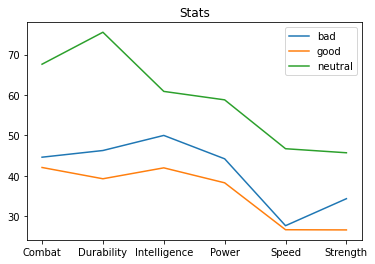

In [8]:
data[:][:-1].plot()
plt.title('Stats')
plt.show()

나쁜 애들이 좋은 애들보다 더 강력하다. 그리고 최고 강력한 아이들은 중립을 지키는 아이들이다.

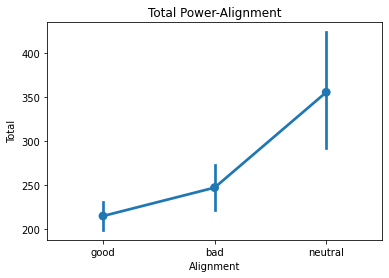

In [9]:
sns.pointplot(x='Alignment', y='Total', data=abengers_df)
plt.title('Total Power-Alignment')
plt.show()

모든 Stats의 합인 Total 값을 비교해보면 좋은 캐릭터보다 나쁜 캐릭터가 강력할 확률이 더 높고 중립의 캐릭터는 그보다 더 강력할 확률이 높음을 알 수 있다.